# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# For tuning the model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSML/Week5/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
df.describe(include='all')

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.000000,4612,4612,4612,4612.000000,4612.000000,4612.000000,4612,4612,4612,4612,4612,4612,4612.000000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT4612,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.201214,NaN,NaN,NaN,3.566782,724.011275,3.026126,NaN,NaN,NaN,NaN,NaN,NaN,0.298569
std,NaN,13.161454,NaN,NaN,NaN,2.829134,743.828683,1.968125,NaN,NaN,NaN,NaN,NaN,NaN,0.457680
min,NaN,18.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,36.000000,NaN,NaN,NaN,2.000000,148.750000,2.077750,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,51.000000,NaN,NaN,NaN,3.000000,376.000000,2.792000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,57.000000,NaN,NaN,NaN,5.000000,1336.750000,3.756250,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [7]:
#lets drop the id column since it has no value to the model
df = df.drop('ID', axis = 1)

In [8]:
#numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')

In [9]:
#categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')

In [10]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000




*   The average age of the people in this dataset is 46 years old.
*   The average time spent on the website is 12 minutes.
*   The average page views is 3
*   The website visits seem to contain an outlier with a max number of visits as 30. It may mean that they were very interested in the platform. It's worth diving deeper to see if the person was converted or not.



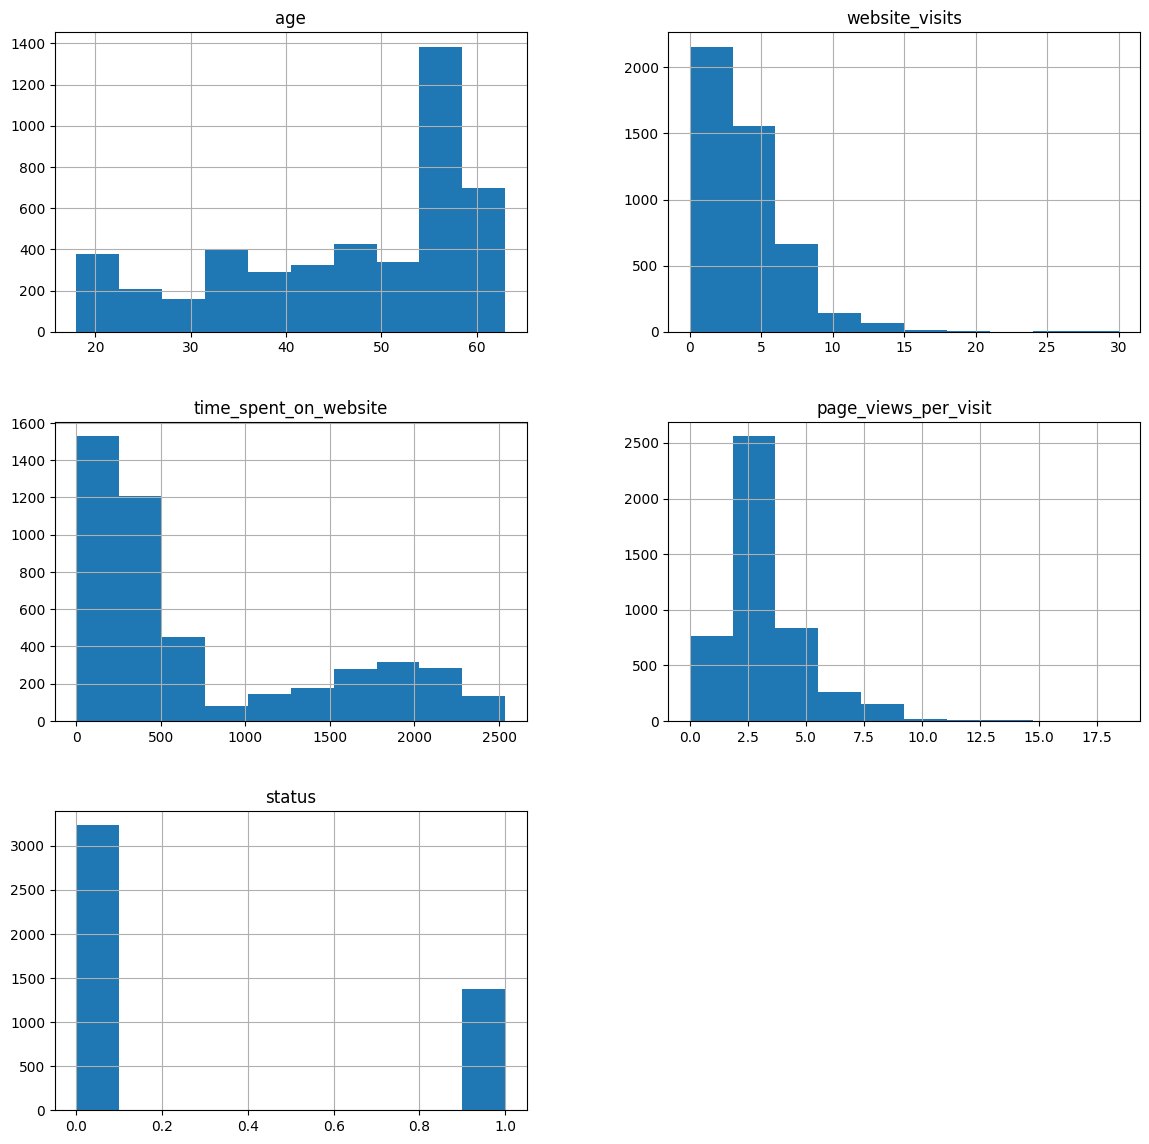

In [11]:
df[num_cols].hist(figsize=(14,14))
plt.show()

From the histograms we can derive the following:

*  Most of the leads are within the 50 - 60 age group, meaning that most of the potential clients in our data are older.

* The leads visit the website less than five times.

* Most leads stay less than eight minutes in the website.

* Most leads visit two pages per visits.

* There are less than 1500 successful conversions in our data.

Let's compare against the successful conversion data.

In [13]:
#storing the converted customers in a new dataframe where we can isolate them.
conv_df = df[df['status'] == 1]

In [15]:
conv_df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
8,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
10,52,Professional,Website,Medium,2,433,2.140,Email Activity,No,No,No,No,No,1


In [16]:
conv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1377 entries, 0 to 4609
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1377 non-null   int64  
 1   current_occupation     1377 non-null   object 
 2   first_interaction      1377 non-null   object 
 3   profile_completed      1377 non-null   object 
 4   website_visits         1377 non-null   int64  
 5   time_spent_on_website  1377 non-null   int64  
 6   page_views_per_visit   1377 non-null   float64
 7   last_activity          1377 non-null   object 
 8   print_media_type1      1377 non-null   object 
 9   print_media_type2      1377 non-null   object 
 10  digital_media          1377 non-null   object 
 11  educational_channels   1377 non-null   object 
 12  referral               1377 non-null   object 
 13  status                 1377 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 161.4+ KB


There are 1377 successful lead conversions in our dataset

In [17]:
conv_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1377.0,NaN,NaN,NaN,48.663762,11.293692,18.0,41.0,54.0,58.0,63.0
current_occupation,1377,3,Professional,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,1377,2,Website,1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,1377,3,High,946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,1377.0,NaN,NaN,NaN,3.538126,2.721075,0.0,2.0,3.0,5.0,25.0
time_spent_on_website,1377.0,NaN,NaN,NaN,1068.397967,780.856643,0.0,390.0,789.0,1829.0,2537.0
page_views_per_visit,1377.0,NaN,NaN,NaN,3.02705,1.896893,0.0,2.083,2.935,3.73,13.656
last_activity,1377,3,Email Activity,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,1377,2,No,1218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,1377,2,No,1302,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Most of our paying clients have a mean age of 48.
* 998 of our clients are professionals.
* 1159 of the clients first interaction was through the website.
* Most of the converted clients have a high profile completion.
* The average amount of website visits for each successfull visit is more than 3.
* The average amount of time every converted lead spends on the website is 17 minutes.
* They view an average of 3 pages per visit

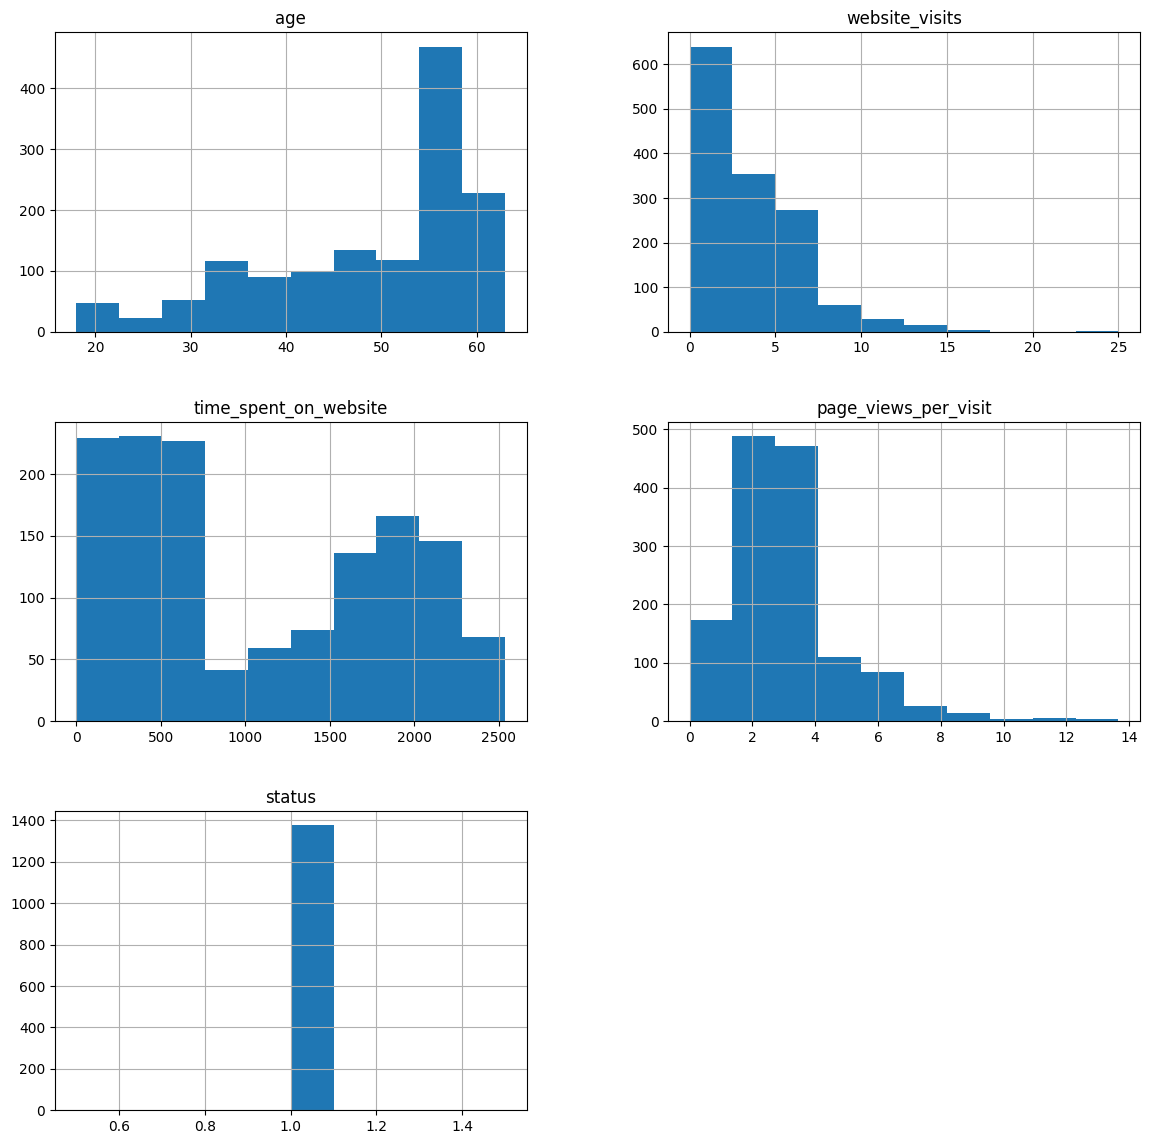

In [14]:
conv_df[num_cols].hist(figsize=(14,14))
plt.show()

The successful lead data shows that

* The age is negatively skewed meaning that most of our successful leads are older, which fits with the data that most of them are professionals.
* The website visits are positively skewed which means that most of the leads visit the website not too freuqently. It might mean that the website has easy navigation or they get lost in the pages.
* The time spent on the website has distribution in both ways meaning that the leads can spend either a short or long amount of time on the website


In [18]:
for i in cat_cols:
    print(conv_df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional    0.674655
Unemployed      0.278141
Student         0.047204
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.841685
Mobile App    0.158315
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.687001
Medium    0.307190
Low       0.005810
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.501816
Website Activity    0.307190
Phone Activity      0.190995
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.884532
Yes    0.115468
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.945534
Yes    0.054466
Name: proportion, dtype: float64
****************************************
digital_media
No     0.877996
Yes    0.122004
Name: proportion, dtype: float64
****************************************
ed

* 67% of the converted leads are professionals, followed by 27% of unemployed leads and the rest belonging to students
* 84% of the converted clients first interact with the website leaving areas for growth for the app
* 69% of the converted clients have a high profile completion followed by 31% of medium completion profile users
* 50% of users last interaction was through email followed by phone interactions with 31%.
* Seems like most of the successful leads do not come to ExtraaLearn by any of the promotional methods (Newspaper, Magazine, ads, educational channels nor referrals). The highest success rate is with educational channels at 14%. There may be immense opportunity to either save cash on stopping funding for ineffective channels or build catered media to our leads.

<Axes: >

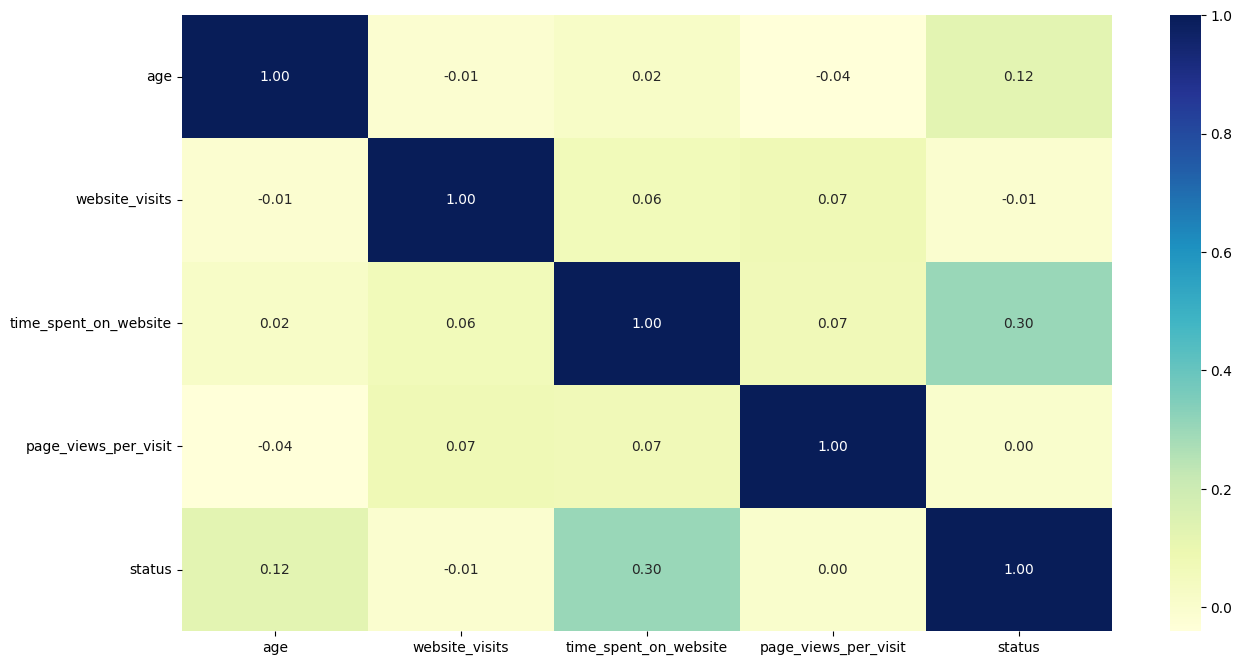

In [22]:
#seeing the correlation of numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

The highest correlation of success is denoted in time spent on the website (.30)and age(.12).


In [23]:
#turning the categorical columns into dummy values
df = pd.get_dummies(df, drop_first=True)

In [24]:
#checking data
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,0,True,False,True,False,False,False,False,False,False,False,False,False


## EDA

- It is a good idea to explore the data once again after manipulating it.

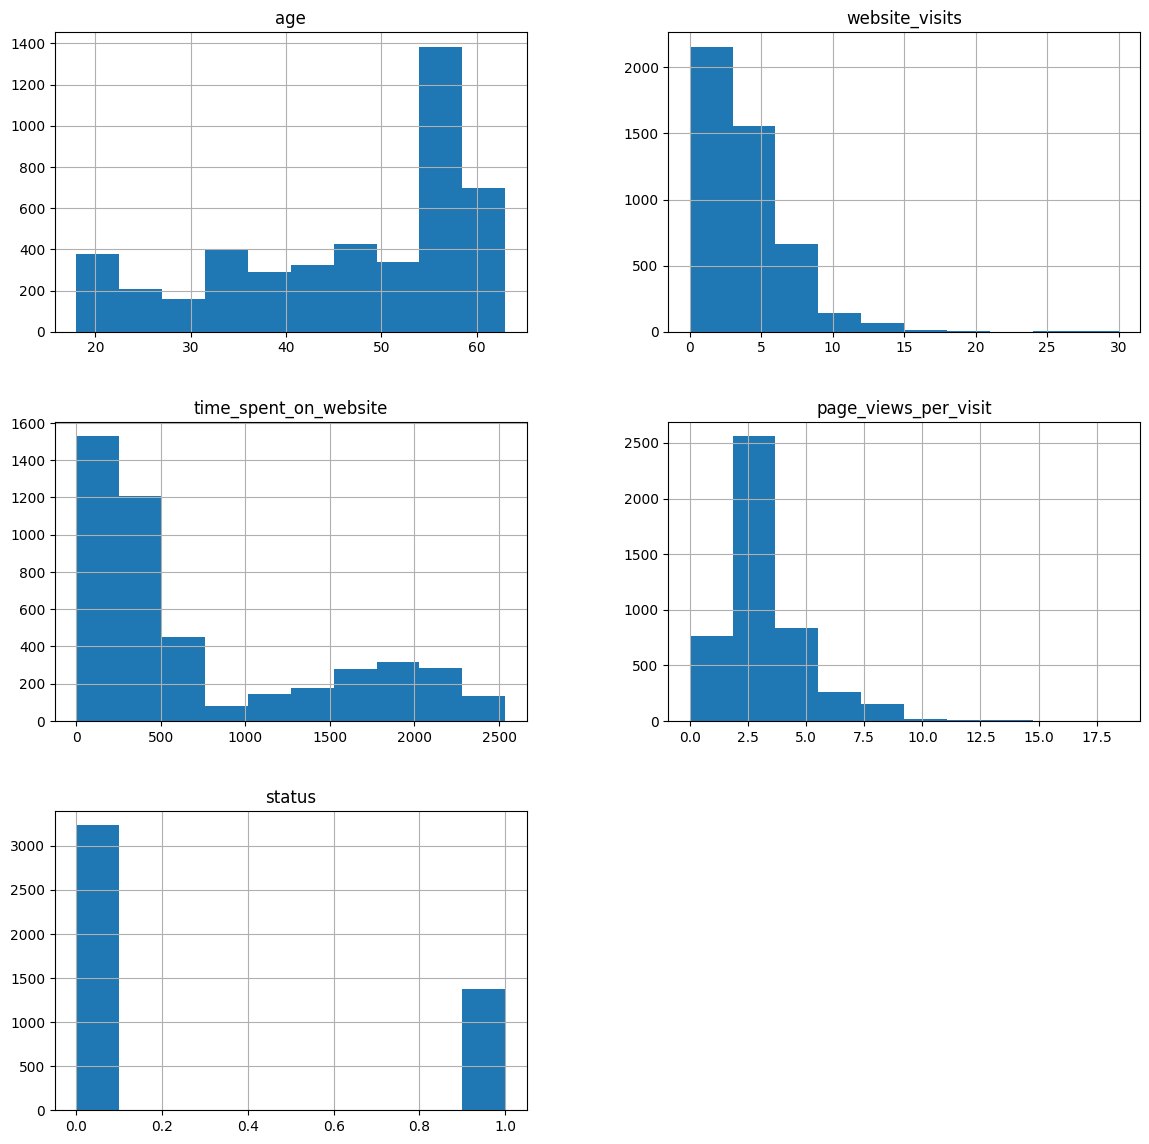

In [25]:
df[num_cols].hist(figsize=(14,14))
plt.show()

## Building a Decision Tree model

In [26]:
#building a decision tree model

X = df.drop('status', axis = 1)
y = df['status']

In [27]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
#lets scale x since the numerical columns are not the same units. Age is in years and time
#spent on the website is in seconds
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Since the classes are imbalanced we will add class weights to punish the model for being biased towards one class


*   Weight for class 0 = 4612 / (2 * 3235) = 4612 / 6470 ≈ 0.713
*   Weight for class 1 = 4612 / (2 * 1377) = 4612 / 2754 ≈ 1.675



In [35]:
dt = DecisionTreeClassifier(class_weight = {0: 0.713, 1: 1.675}, random_state = 1)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.713, 1: 1.675}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2258
           1       1.00      1.00      1.00       970

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



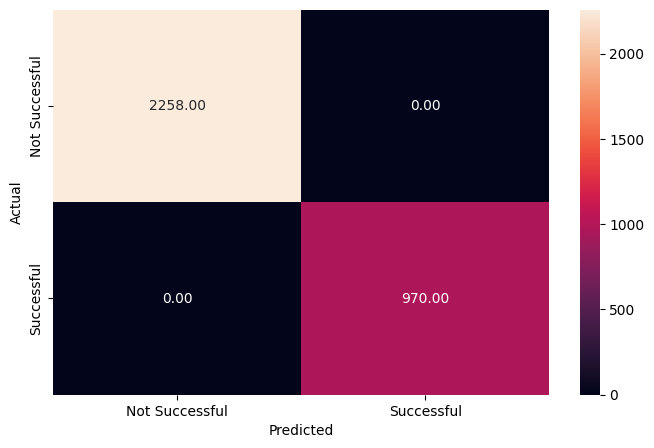

In [36]:
y_train_pred = dt.predict(x_train)
metrics_score(y_train, y_train_pred)

The model predicted perfectly on the training data with the given class weights

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       977
           1       0.68      0.66      0.67       407

    accuracy                           0.81      1384
   macro avg       0.77      0.76      0.77      1384
weighted avg       0.81      0.81      0.81      1384



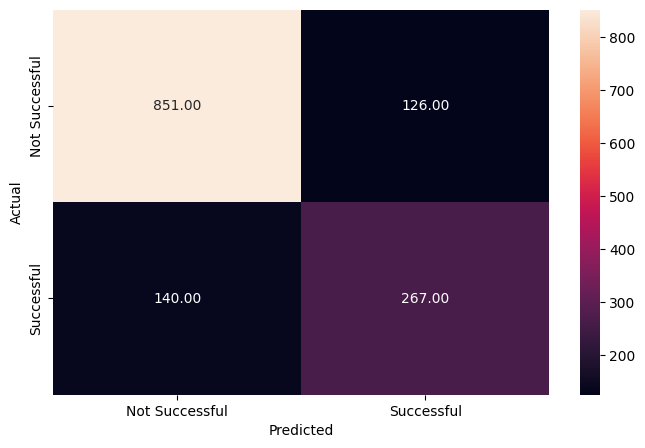

In [37]:
y_test_pred = dt.predict(x_test)
metrics_score(y_test, y_test_pred)

The model predicted poorly against the test data in accuracy 1 vs .81. And an even worse recall at .66.

<Axes: xlabel='Importance', ylabel='None'>

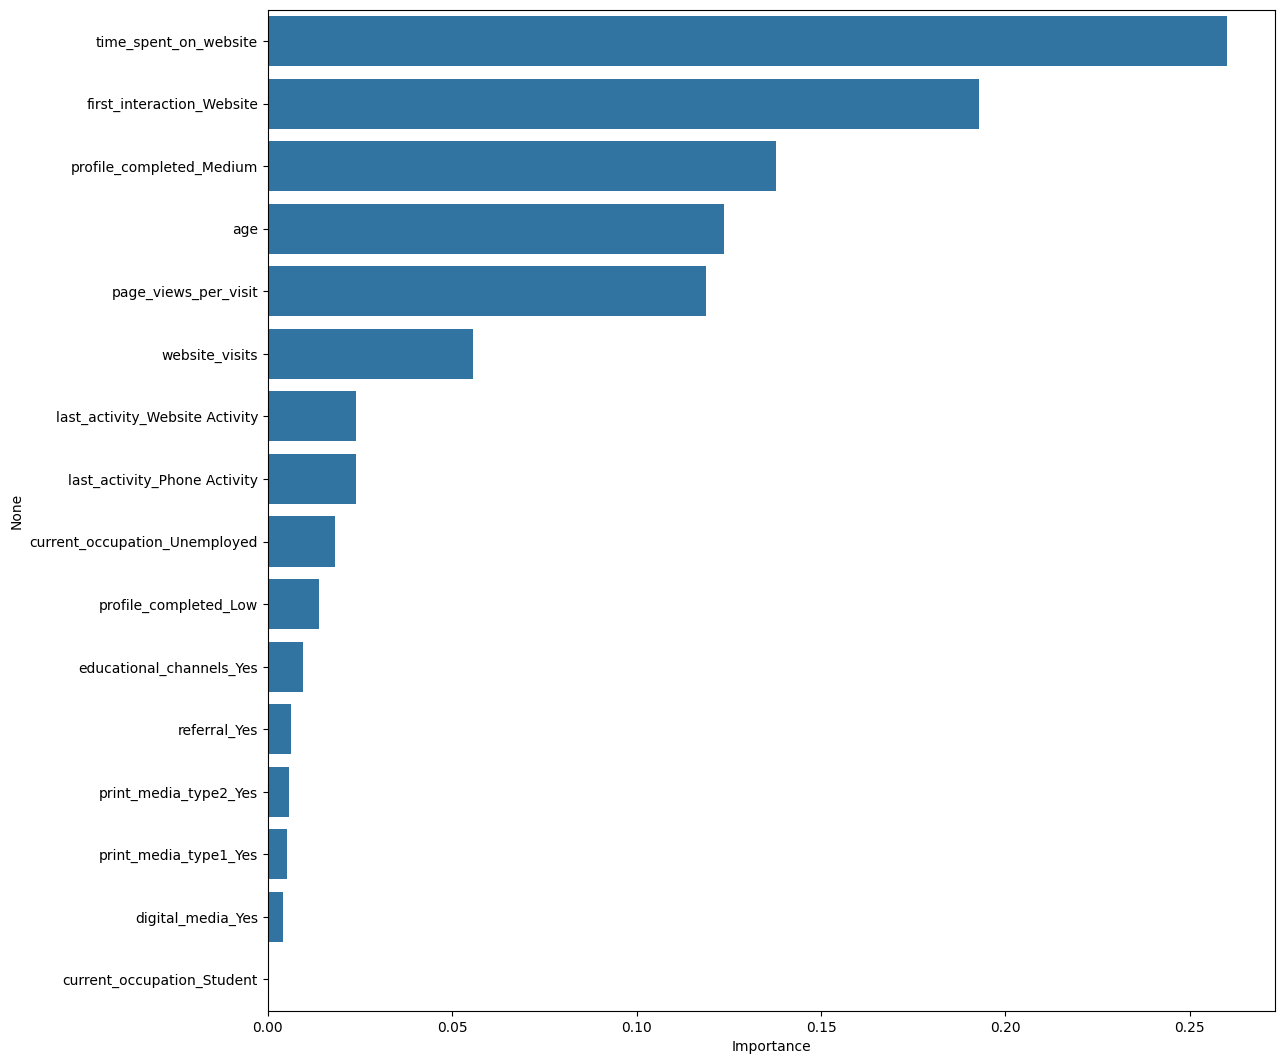

In [38]:
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)


As expected the most important feature is the time spent on the website of the lead. Followed by the first interaction.

## Do we need to prune the tree?

It achieved perfect scores on the training set but significantly lower scores on the test set. This indicates that the tree has become too complex and has learned the noise in the training data rather than the underlying patterns. Yes, we will need to rpune the tree so it performs better on unseen data

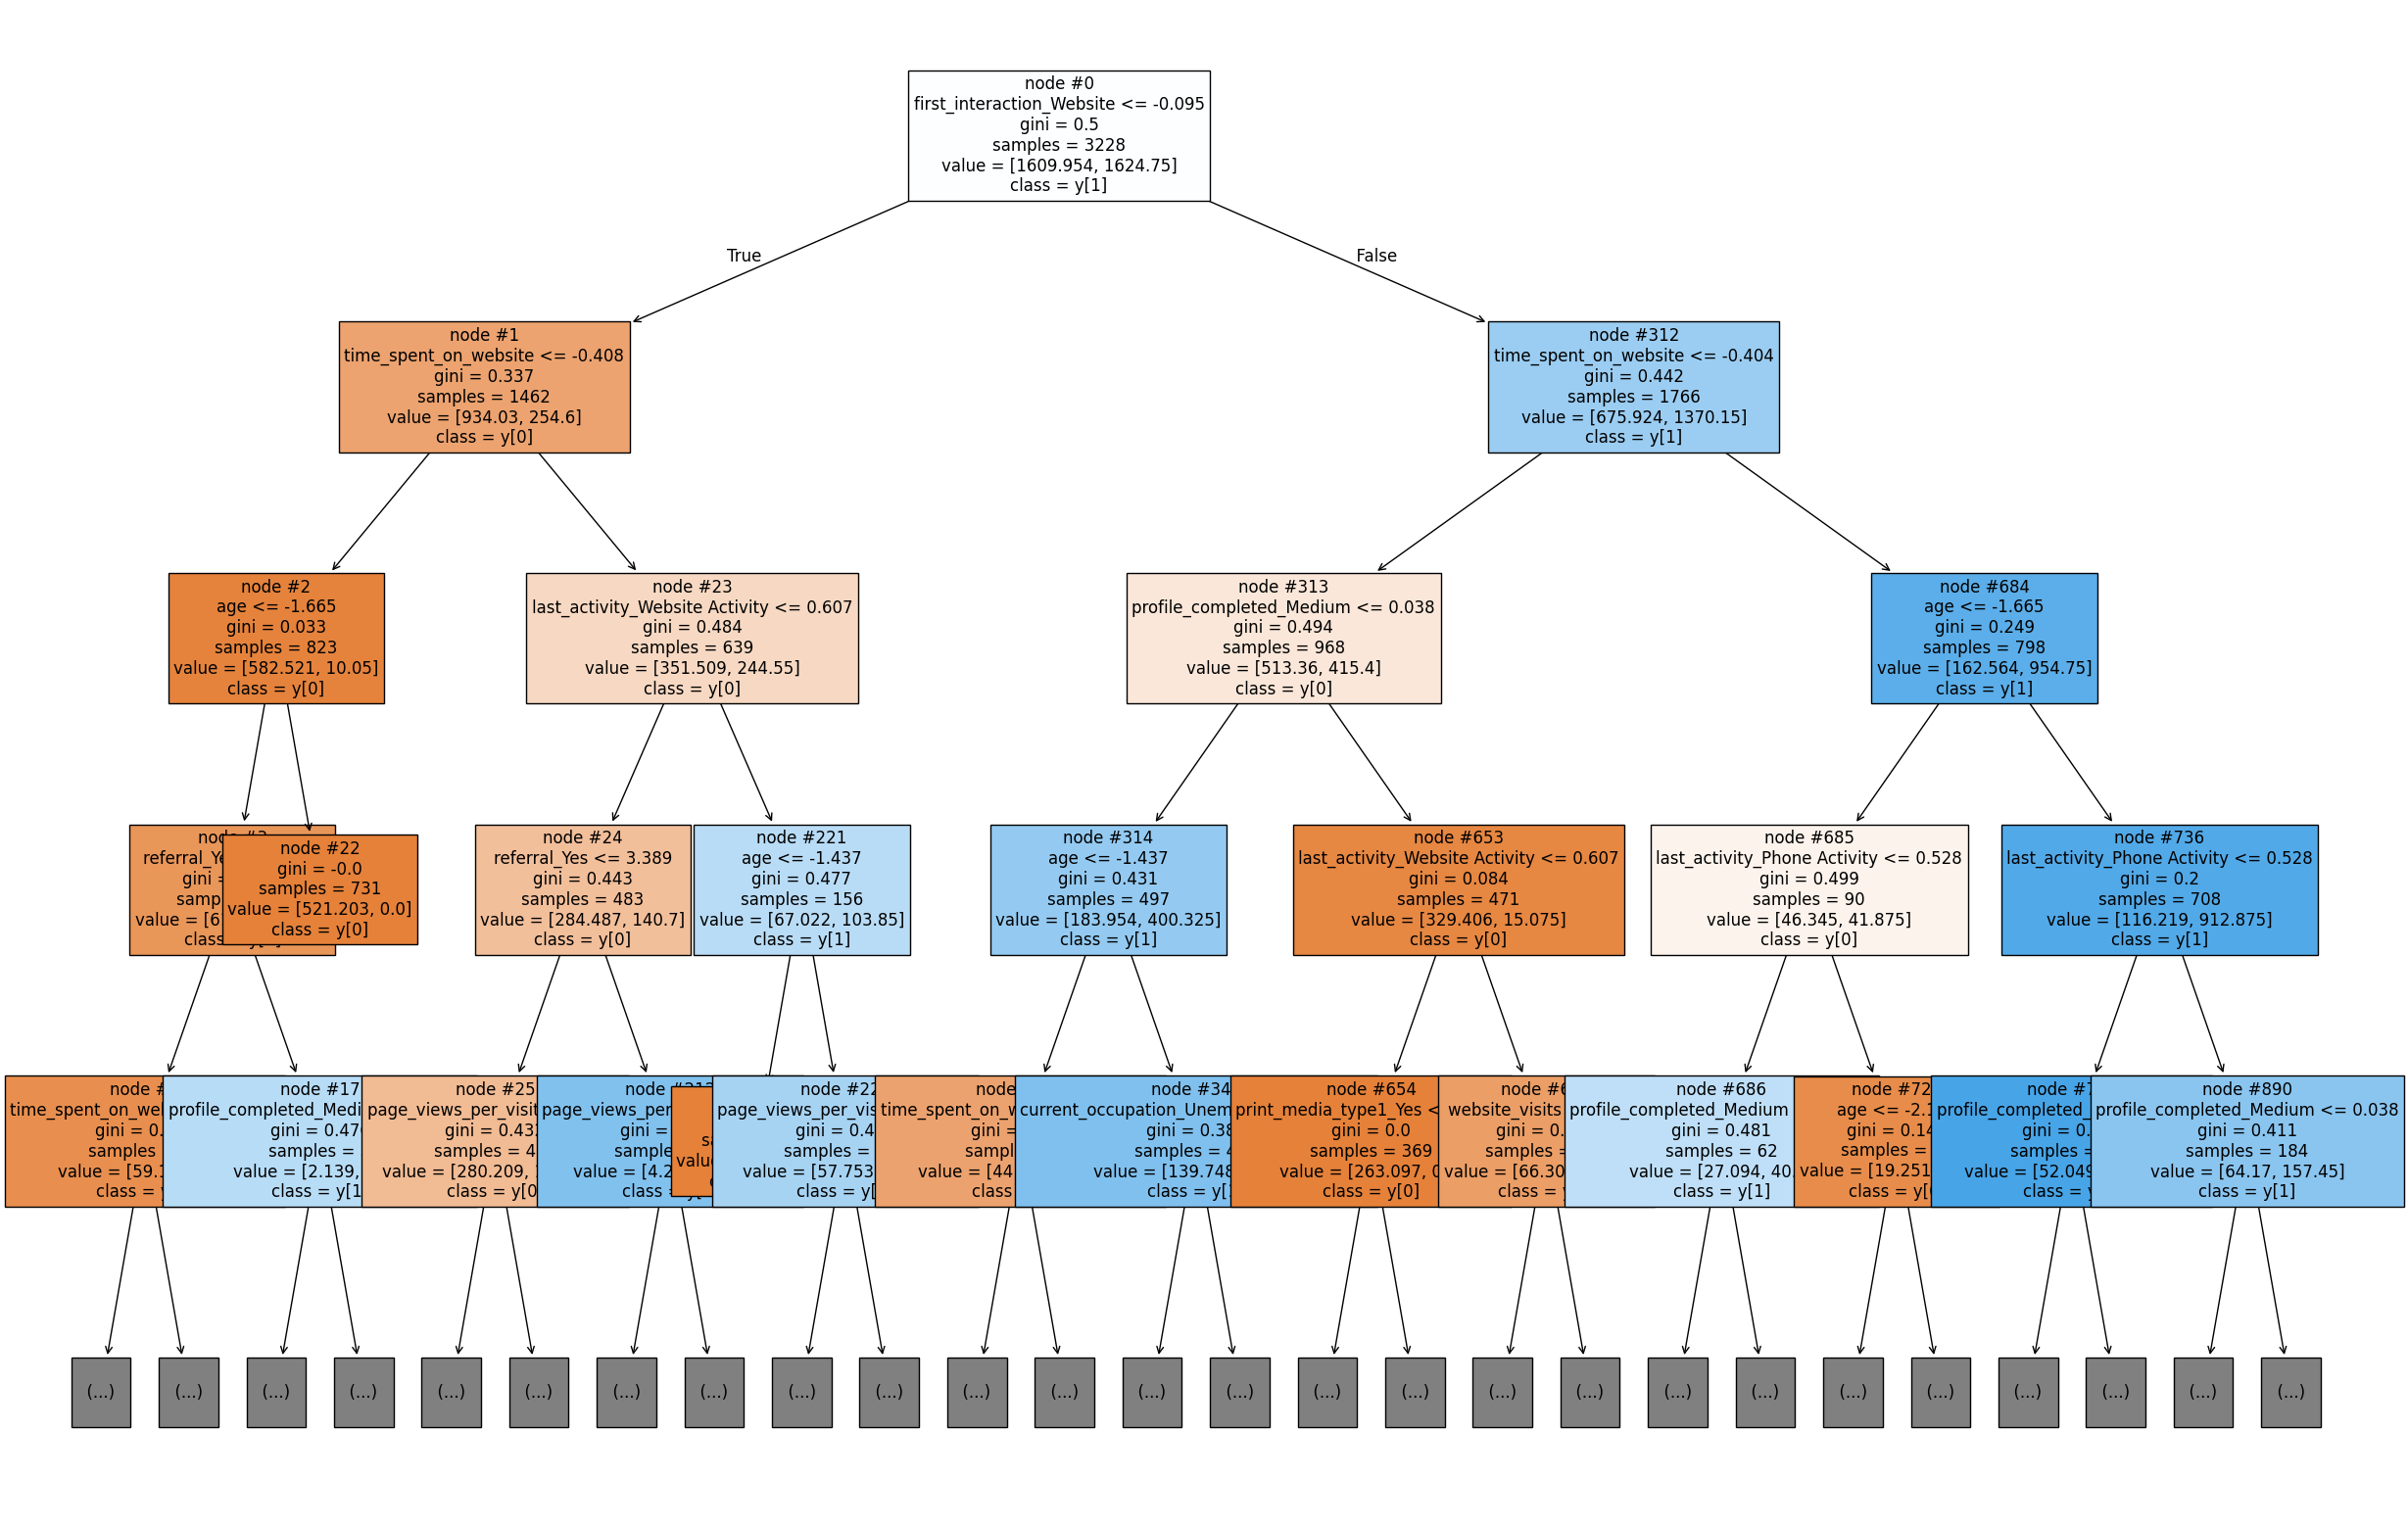

In [43]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [44]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.713, 1: 1.675}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.713, 1: 1.675}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2258
           1       1.00      1.00      1.00       970

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



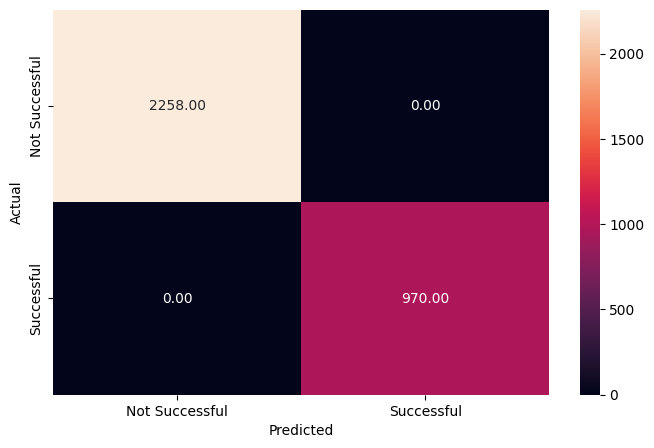

In [45]:
y_rftrain_pred = rf_estimator.predict(x_train)
metrics_score(y_train, y_rftrain_pred)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       977
           1       0.79      0.67      0.73       407

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



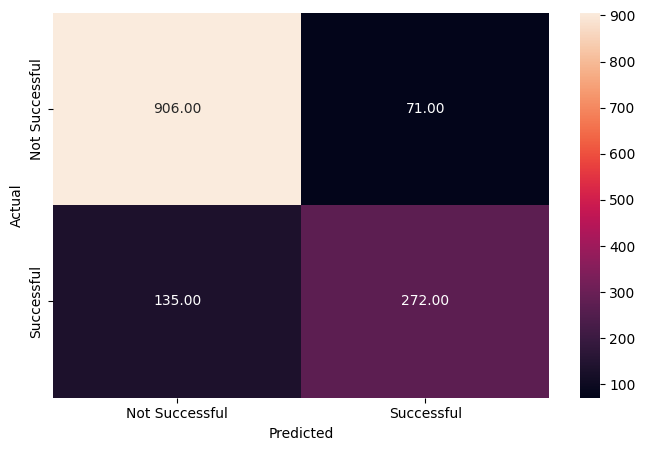

In [46]:
y_rftest_pred = rf_estimator.predict(x_test)
metrics_score(y_test, y_rftest_pred)

The tree performed perfectly on the training data but gave a .67 recall on testing data which sugegsts that the tree is overfitting to the data.

<Axes: xlabel='Importance', ylabel='None'>

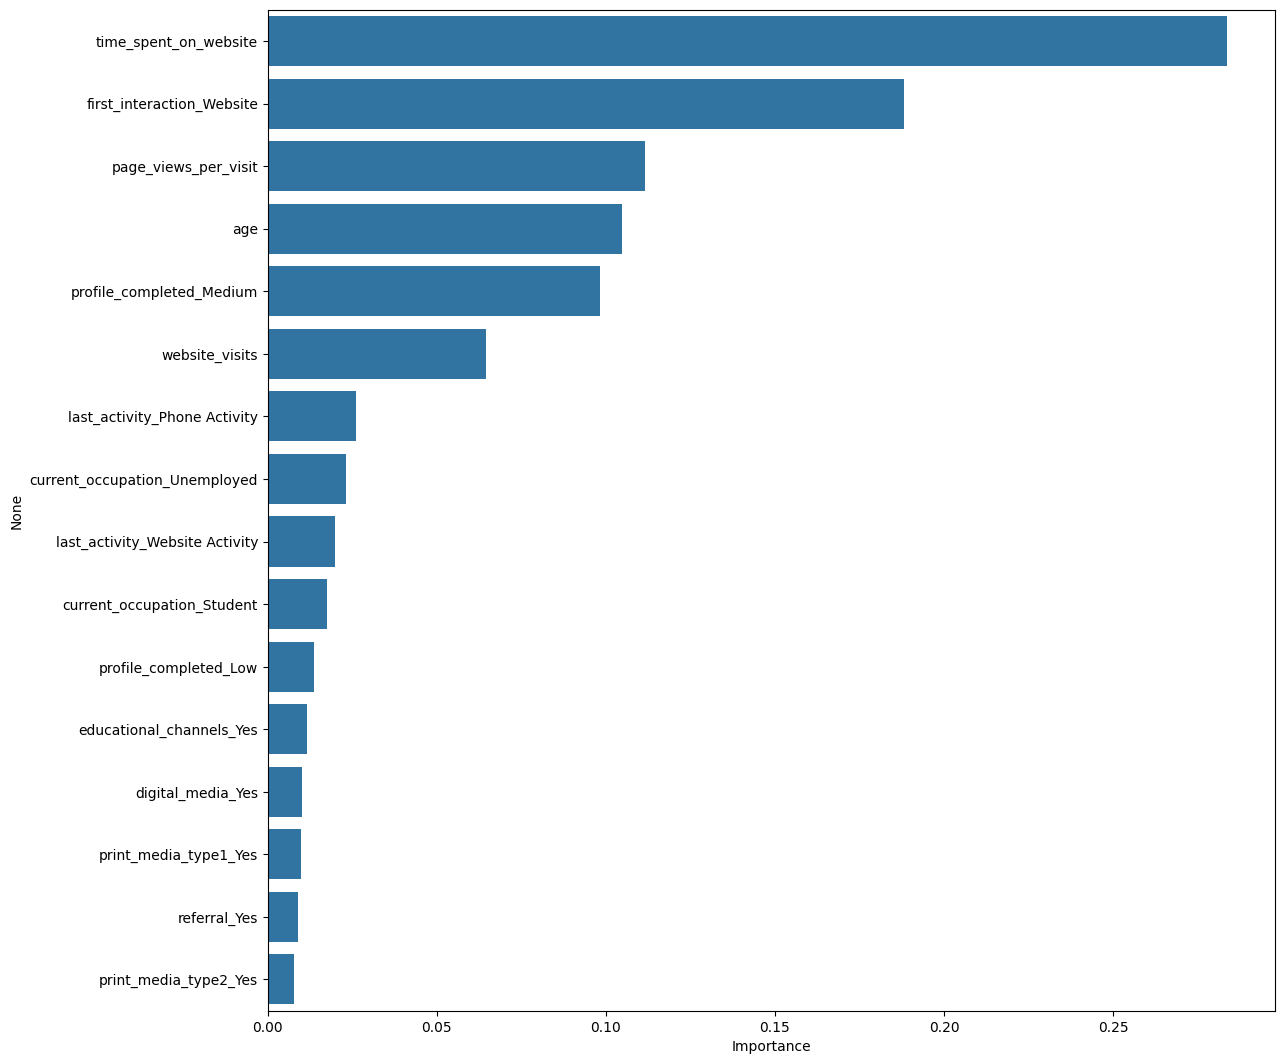

In [47]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

The same features are most important as the decision tree.

## Do we need to prune the tree?

Yes, as the model is overfitting to the data we will need to reduce the complexity to better predict when a lead will be succesful or not.

## Actionable Insights and Recommendations

## Observations, Actionable Insights, and Recommendations

### Observations:

*   **Age and Occupation:** A significant portion of the leads and converted customers are older professionals (mean age of successful leads is 48.66).
*   **First Interaction:** The website is the primary first point of interaction for both overall leads and converted customers.
*   **Profile Completion:** Leads with higher profile completion rates tend to convert more often.
*   **Last Activity:** Email and Website activities are the most common last interactions for converted leads.
*   **Marketing Channels:** Traditional and digital media channels, as well as referrals and educational channels, seem to have a lower direct impact on conversion compared to other factors.
*   **Website Engagement:** Time spent on the website and page views per visit are important factors, with successful leads spending more time on the website.
*   **Model Performance:** Both the Decision Tree and Random Forest models show signs of overfitting, performing very well on the training data but with lower recall on the test data. Time spent on the website is identified as the most important feature by both models.

### Actionable Insights:

*   **Targeting:** Focus marketing efforts on older professionals, as they represent a significant portion of converted leads.
*   **Website Optimization:** Improve the website experience to encourage longer visits and more page views, as this correlates with higher conversion rates.
*   **Profile Completion:** Implement strategies to encourage leads to complete their profiles, highlighting the benefits of doing so.
*   **Engagement Channels:** Investigate why marketing channels have lower conversion rates and explore ways to make them more effective or reallocate resources.
*   **Model Improvement:** Address the overfitting issue in the models by pruning the Decision Tree and tuning the Random Forest to improve their performance on unseen data.

### Recommendations:

*   **Develop targeted marketing campaigns** specifically for older professionals, highlighting how ExtraaLearn's programs can benefit their careers.
*   **Enhance the website user interface and content** to make it more engaging and informative, encouraging leads to spend more time and explore more pages. Consider personalized content based on user behavior.
*   **Implement incentives or clearer communication** about the benefits of completing the profile to increase completion rates.
*   **Analyze the effectiveness of different marketing channels** in detail to understand which ones are most cost-effective and where improvements can be made. Consider A/B testing different approaches.
*   **Tune the hyperparameters of the Decision Tree and Random Forest models** to find the optimal balance between bias and variance, improving their predictive power on new leads. Techniques like cross-validation and grid search can be used for this.
*   **Explore other machine learning models** that might be more robust to imbalanced datasets and less prone to overfitting.
*   **Consider gathering more data** on lead interactions and behavior to further refine the models and gain deeper insights into the conversion process.